<a href="https://colab.research.google.com/github/dianaalme46-hue/compling-course/blob/main/convnet_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.YMHB5V_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.YMHB5V_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.YMHB5V_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


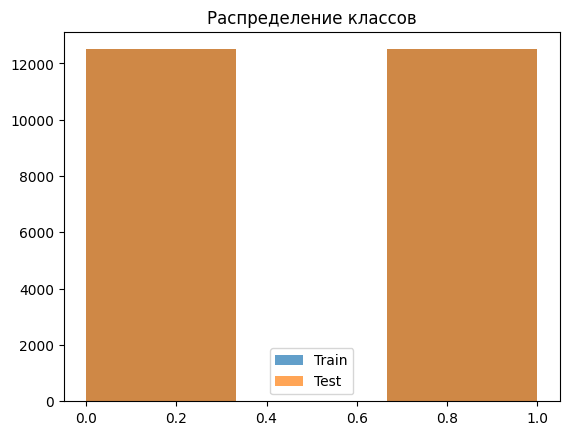

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
dataset = tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
# Используйте tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
train_set, test_set = dataset
# Преобразуйте данные в numpy массивы (x_train, y_train), (x_test, y_test)
train_set = list(train_set.as_numpy_iterator())
test_set = list(test_set.as_numpy_iterator())
x_train = np.array([item[0].decode('utf-8') for item in train_set])
y_train = np.array([item[1] for item in train_set])
x_test = np.array([item[0].decode('utf-8') for item in test_set])
y_test = np.array([item[1] for item in test_set])
print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

## БЛОК 2: Предобработка текста

In [2]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
vectorizer = keras.layers.TextVectorization(max_tokens = 10000, output_sequence_length = 200)
# vectorizer = keras.layers.TextVectorization(max_tokens=..., output_sequence_length=...)

# 4. Адаптируйте векторзатор на тренировочных текстах
vectorizer.adapt(x_train)
# vectorizer.adapt(...)

# 5. Примените векторзацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размерность после векторизации: (25000, 200)


## БЛОК 3: Построение модели

In [23]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
#    - Вход: векторная последовательность (200,)
#    - Embedding: размерность 128, входной словарь 10_000
#    - Conv1D: 64 фильтра, размер ядра 5, активация 'relu'
#    - GlobalMaxPooling1D
#    - Dense: 32 нейрона, 'relu'
#    - Dense: 1 нейрон, 'sigmoid' (бинарная классификация)
model = keras. Sequential([
    keras.layers.Embedding(10000, 128, input_length = 200),
    keras.layers.Conv1D(64, 5, activation='relu',),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# model = keras.Sequential([...])
model.build(input_shape=(None, 200))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,137 (5.05 MB)

 Trainable params: 1,323,137 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 66ms/step - Precision: 0.6855 - Recall: 0.6313 - accuracy: 0.6807 - loss: 0.5594 - val_Precision: 0.8627 - val_Recall: 0.8692 - val_accuracy: 0.8638 - val_loss: 0.3174
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - Precision: 0.9207 - Recall: 0.9218 - accuracy: 0.9211 - loss: 0.2092 - val_Precision: 0.8911 - val_Recall: 0.8435 - val_accuracy: 0.8686 - val_loss: 0.3125
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - Precision: 0.9879 - Recall: 0.9847 - accuracy: 0.9865 - loss: 0.0562 - val_Precision: 0.8763 - val_Recall: 0.8680 - val_accuracy: 0.8712 - val_loss: 0.3753
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - Precision: 0.9997 - Recall: 0.9992 - accuracy: 0.9995 - loss: 0.0077 - val_Precision: 0.8670 - val_Recall: 0.8807 - val_accuracy: 0.8712 - val_loss: 0.4493
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0012 - val_Precision: 0.8685 - val_Re

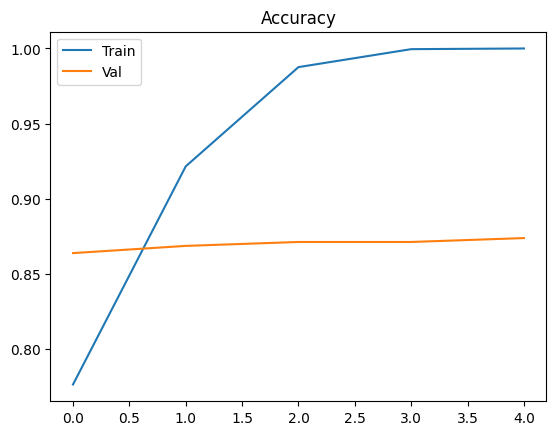

In [24]:
# 7. Скомпилируйте модель с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']
model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'Precision', 'Recall'])
# model.compile(...)

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32
history = model.fit(x_train_vec, y_train,
                    epochs=5,
                    validation_split=0.2,
                    batch_size=32)
# history = model.fit(...)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()

## БЛОК 5: Оценка

In [26]:
# 10. Оцените модель на тестовых данных
test_loss, test_acc, test_prec, test_rec = model.evaluate(x_test_vec, y_test, verbose=0)
# test_loss, test_acc, test_prec, test_rec = model.evaluate(...)

print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")

# 11. Сделайте предсказания на первых 10 тестовых отзывах
#     и выведите: текст отзыва, истинный класс, предсказанный класс, вероятность
for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"
    pred_prob = model.predict(np.expand_dims(x_test_vec[i], axis=0))
    pred_label = "POS" if pred_prob > 0.5 else "NEG"
    # pred_prob = model.predict(...)
    # pred_label = "POS" if pred_prob > 0.5 else "NEG"
    print(f"{text[:50]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")


Тестовая accuracy: 0.8647
Тестовая precision: 0.8644
Тестовая recall: 0.8652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
There are films that make careers. For George Rome... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
A blackly comic tale of a down-trodden priest, Naz... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Scary Movie 1-4, Epic Movie, Date Movie, Meet the ... | True: NEG | Pred: NEG (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Poor Shirley MacLaine tries hard to lend some grav... | True: NEG | Pred: NEG (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
As a former Erasmus student I enjoyed this film ve... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
My God, Ryan Gosling has made a lot of deep charac... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This film just won the best film award at the Clev... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The cast for this produ

In [31]:
for i in range(10):
  print(x_test[i])

There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.
A blackly comic tale of a down-trodden priest, Nazarin showc

## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1.  Итоговая точность на тесте составляет 0.8647 -- примерно 86%.
2.  Разница между точностью на обучении и валидации показывает, есть ли переобучение. Исходя из графика видно, что точность на обучающих данных растет стремительно и достигает 100 процентов, а на валидационных данных растет медленно, но и не уменьшается. Таким образом, можно говорить о небольшом переобучении.
3.  Для десятого отзыва сделано неверное предсказание (NEG),  так как отзыв на самом деле позитивный (True: POS). Мне кажется, это могло произойти по трем причинам. Во-первых, в самом начале отзыва автор говорит о своих заниженных ожиданиях (которые не оправдались), модель могла это распознать как подлинный отклик о фильме. Во-вторых, в тексте пару раз встречаются слова с негативной эмоциональной окраской ("will be disappointed with the ending's simplicity"), но здесь автор говорит не про свое впечатление, а обрисовывает гипотетически вероятную ситуацию, относящуюся к другим зрителям. Наконец, в отзыве происходит сравнение с образом менее удачного фильма ("a lesser film") с целью выделить достоинства просмотренного кино, однако модель могла не различить сопоставления и потому отнести эпитет "lesser" к оцениваемому фильму.